In [8]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
def spatial_derivative(B, dx):
    
    # 6th order central difference
    B_ = np.copy(B)
    
    # putting relative anti-symmetric ghost zone
    B_ = np.append(-np.flip(B_[1:4]), B_)
    B_ = np.append(B_, -np.flip(B_[-4:-1]))
    B_[0:3] = B_[0:3] + (2 * B[0])
    B_[-3:] = B_[-3:] + (2 * B[-1])
    
    # blank array to append the ghost zones
    # B = np.append(B, np.zeros(3))
    # B = np.append(np.zeros(3), B)
    
    
    dfdx = []
    ddfddx = []
    
    # 6th order finite difference
    for i in range(3,len(B_)-3):
        dfdx.append(((- B_[i-3]) + (9*B_[i-2]) - (45*B_[i-1]) + (45*B_[i+1]) - (9*B_[i + 2]) + (B_[i + 3])) / (60 * dx))
        ddfddx.append(((2*B_[i-3]) - (27*B_[i-2]) + (270*B_[i-1]) - (490*B_[i]) + (270*B_[i+1]) - (27*B_[i+2]) + (2*B_[i+3])) / (180 * (dx ** 2)))
    
    dfdx = np.array(dfdx)
    ddfddx = np.array(ddfddx)
    
    return dfdx, ddfddx

In [108]:
# test - disable later
B = np.array([1,2,3,4,5,6,7,8,9,10])
B_ = np.copy(B)
    
B_ = np.append(np.flip(B_[1:4]), B_)
B_ = np.append(B_, np.flip(B_[-4:-1]))

print(B_)

[ 4  3  2  1  2  3  4  5  6  7  8  9 10  9  8  7]


In [109]:
# eta = 0.5 # ritabik code
# r_i = 0.1
# r_f = 15
# Nr = 200
# T = 5
# Nt = 500
# h = 1


# def B_r0(r):
#     return np.sin((4 * np.pi * r/r_f))

# def dBrdt(B, r):
#     return np.gradient((1/r)*np.gradient(r*B, dr), dr) - ((np.pi)**2)*B/(4*h**2)

# # defining intial B_r
# r = np.linspace(r_i, r_f, Nr)
# B_r = B_r0(r)
# dt = T/Nt


# B_list = [B_r]

# dr = r[1] - r[0]

# for i in tqdm(range(Nt)):    
#     k1 = dt * dBrdt(B_r, r)
#     k2 = dt * dBrdt(B_r + (k1/2), r)
#     k3 = dt * dBrdt(B_r + (k2/2), r)
#     k4 = dt * dBrdt(B_r + k3, r)
    
#     B_r = B_r + (k1 + (2*k2) + (2*k3) + k4)/6
    
#     B_list.append(B_r)

In [5]:
eta = 0.5
r_i = 0.1
r_f = 15
Nr = 500
T = 1.5
Nt = 3000
h = 1


Nt_ = (2 * eta * T) / (((r_f - r_i)/(Nr - 1))**2)

print("needed Nt >",Nt_)

needed Nt > 1682.3634070537362


In [22]:
eta = 0.5
r_i = 0.1
r_f = 15
Nr = 500
T = 1.5
Nt = 3000
h = 1
Save = 500 #points


# def spatial_derivative(B, dx):
#     dBdr = np.gradient(B, dx)
#     ddBddr = np.gradient(dBdr, dx)
#     return dBdr, ddBddr

def B_r0(r):
    return np.sin((4 * np.pi * r/r_f))

def dBrdt(B, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B/(r**2) - (((np.pi ** 2) * B) / (4 * (h ** 2))))


# defining intial B_r
r = np.linspace(r_i, r_f, Nr)
B_r = B_r0(r)
dt = T/Nt

save_buffer = int(Nt / Save)

B_list = [B_r]

dr = r[1] - r[0]

for i in tqdm(range(1, Nt+1)):
    dBdr, ddBddr = spatial_derivative(B_r, dr)
    
    k1 = dt * dBrdt(B_r, dBdr, ddBddr, r)
    k2 = dt * dBrdt(B_r + (k1/2), dBdr, ddBddr, r)
    k3 = dt * dBrdt(B_r + (k2/2), dBdr, ddBddr, r)
    k4 = dt * dBrdt(B_r + k3, dBdr, ddBddr, r)
    
    B_r = B_r + (k1 + (2*k2) + (2*k3) + k4)/6
    
    if (i % save_buffer) == 0:
        B_list.append(B_r)

100%|██████████| 3000/3000 [00:05<00:00, 505.77it/s]


In [21]:
a = []

for i in range(10):
    # print(i)
    j = i % 2
    # print(j)
    if j == 0:
        a.append(i)
        
print(a)

[0, 2, 4, 6, 8]


In [111]:
# eta = 1
# r_i = 0.1
# r_f = 8
# Nr = 100
# T = 1
# Nt = 1
# h = 1

# def B_r0(r):
#     return np.sin((r_i - r)*5/8*np.pi) + np.sin((r_i - r)*6/8*np.pi) + np.sin((r_i - r)*4/8*np.pi)

# def dBrdt(B, dBdr, ddBddr, r):
#     return eta * (ddBddr + (dBdr/r) - B/(r**2) + (((np.pi ** 2) * B) / (4 * (h ** 2))))

# # defining intial B_r
# r = np.linspace(r_i, r_f, Nr)
# B_r = B_r0(r)

# B_list = [B_r]

# dr = r[1] - r[0]

# for i in tqdm(range(Nt)):
#     dBdr, ddBddr = spatial_derivative(B_r, dr)
    
#     k1 = h * dBrdt(B_r, dBdr, ddBddr, r)
#     k2 = h * dBrdt(B_r + (k1/2), dBdr, ddBddr, r)
#     k3 = h * dBrdt(B_r + (k2/2), dBdr, ddBddr, r)
#     k4 = h * dBrdt(B_r + k3, dBdr, ddBddr, r)
    
#     B_r = B_r + (k1 + (2*k2) + (2*k3) + k4)/6
    
#     B_list.append(B_r)

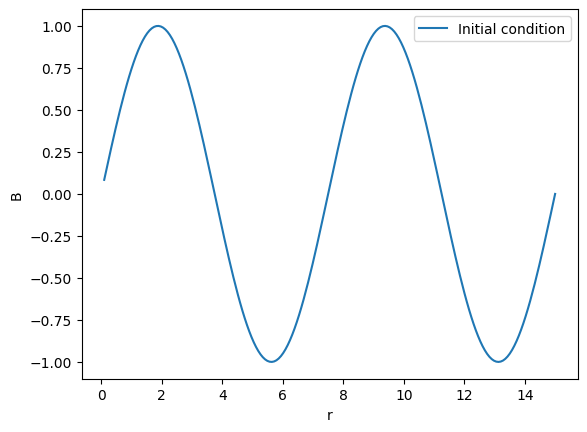

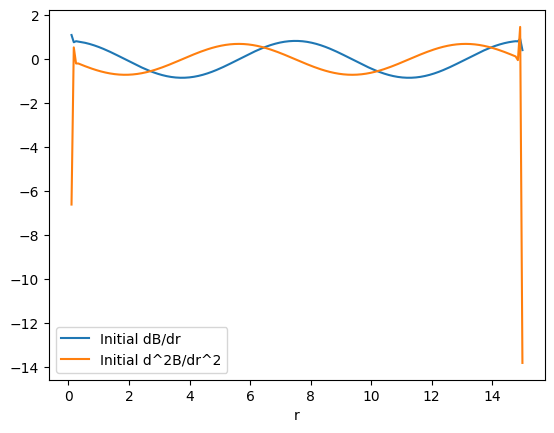

In [116]:
# plotting initial condition
plt.plot(r, B_list[0], label = 'Initial condition')
plt.xlabel('r')
plt.ylabel('B')
plt.legend()
plt.show()

dBdr, ddBddr = spatial_derivative(B_list[0], dr)
plt.plot(r, dBdr, label = 'Initial dB/dr')
plt.plot(r, ddBddr, label = 'Initial d^2B/dr^2')
plt.xlabel('r')
plt.legend()
plt.show()


In [113]:
print(B_list[-1])

[ 1.82857273e+25 -2.56660149e+25  3.06808300e+25 -3.44072429e+25
  3.73162583e+25 -3.96484224e+25  4.15399795e+25 -4.30760823e+25
  4.43137892e+25 -4.52935591e+25  4.60454977e+25 -4.65929824e+25
  4.69548762e+25 -4.71469374e+25  4.71827459e+25 -4.70743269e+25
  4.68325800e+25 -4.64675768e+25  4.59887692e+25 -4.54051353e+25
  4.47252800e+25 -4.39575044e+25  4.31098500e+25 -4.21901271e+25
  4.12059294e+25 -4.01646394e+25  3.90734273e+25 -3.79392450e+25
  3.67688164e+25 -3.55686263e+25  3.43449082e+25 -3.31036311e+25
  3.18504876e+25 -3.05908819e+25  2.93299199e+25 -2.80724002e+25
  2.68228067e+25 -2.55853033e+25  2.43637306e+25 -2.31616043e+25
  2.19821158e+25 -2.08281344e+25  1.97022119e+25 -1.86065884e+25
  1.75432003e+25 -1.65136892e+25  1.55194128e+25 -1.45614569e+25
  1.36406478e+25 -1.27575670e+25  1.19125650e+25 -1.11057768e+25
  1.03371374e+25 -9.60639767e+24  8.91314020e+24 -8.25679507e+24
  7.63665554e+24 -7.05189343e+24  6.50157397e+24 -5.98467020e+24
  5.50007674e+24 -5.04662

In [15]:
len(B_list)

6

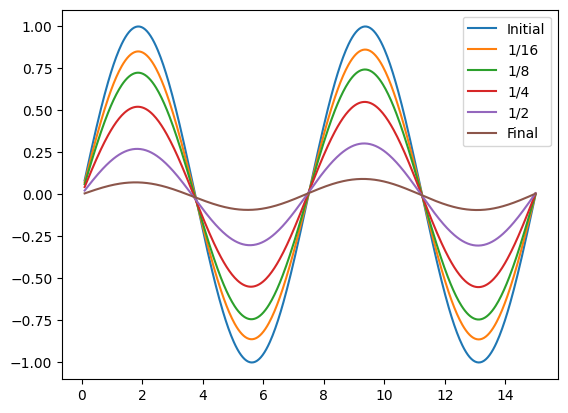

In [23]:
# plotting
fig, ax = plt.subplots()
ax.plot(r, B_list[0], label='Initial')
# ax.plot(r, B_list[1], label='1')
# ax.plot(r, B_list[2], label='2')
ax.plot(r, B_list[int(Save/16)], label='1/16')
ax.plot(r, B_list[int(Save/8)], label='1/8')
ax.plot(r, B_list[int(Save/4)], label='1/4')
ax.plot(r, B_list[int(Save/2)], label='1/2')
ax.plot(r, B_list[-1], label='Final')
ax.legend()
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

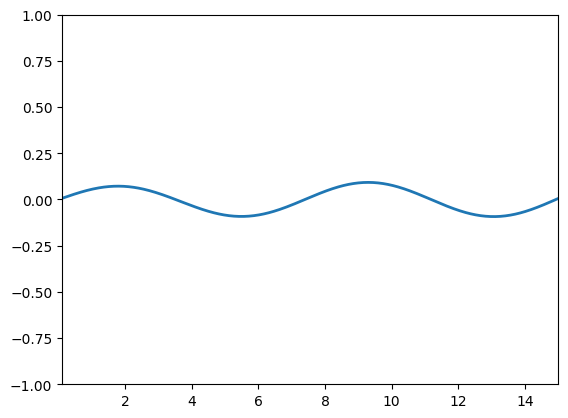

In [24]:
# animate using matplotlib
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(-1, 1)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    y = B_list[i]
    line.set_data(x, y)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt, init_func=init, blit=True)
ani.save('B_r5.gif', writer='ffmpeg', fps=30)

# plt.show()


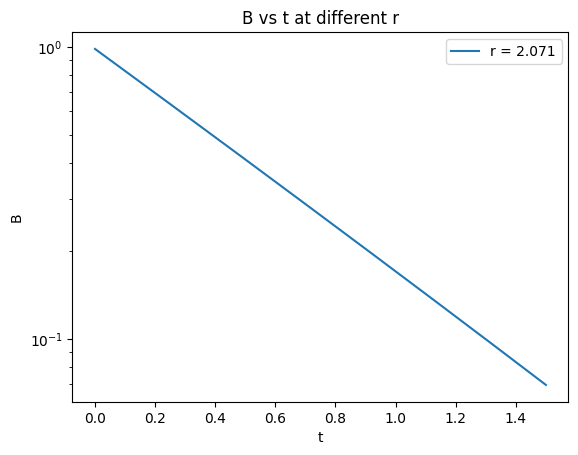

In [31]:
B_list_t = np.transpose(B_list)
t_list = np.linspace(0, T, len(B_list_t))

index = int(200 / 3)

plt.plot(t_list, B_list_t[index][1:], label = f'r = {r[index]:.3f}')
plt.xlabel('t')
plt.ylabel('B')
plt.legend()
plt.title('B vs t at different r')
plt.yscale('log')
plt.show()
